In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [2]:
# read data
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
fraud_check = df['Class'].value_counts()
fraud_check

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Noraml and Fraud Distribution')

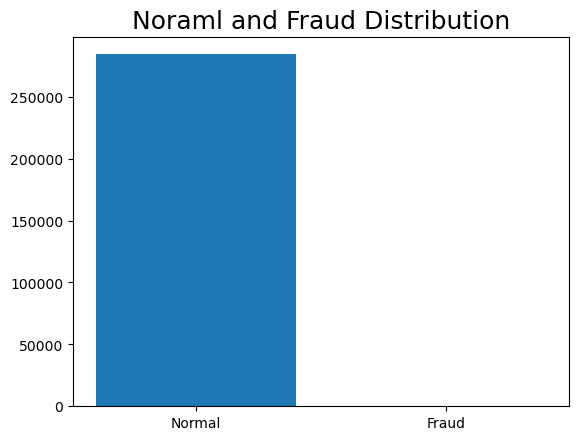

In [6]:
xlabels = ['Normal', 'Fraud']
plt.bar(xlabels, fraud_check.values)
plt.title('Noraml and Fraud Distribution', fontsize=18)

Text(0.5, 1.0, 'Noraml and Fraud Percentage')

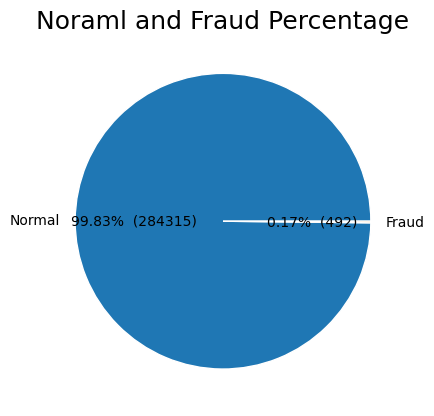

In [7]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(fraud_check.values, labels = xlabels, autopct=make_autopct(fraud_check.values),
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'}) 
plt.title('Noraml and Fraud Percentage', fontsize=18)

### Spliting the data

In [8]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

In [9]:
df_fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
df_normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

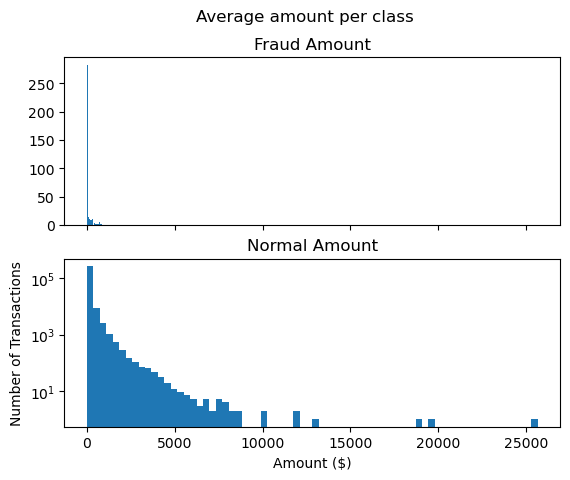

In [11]:
graph, (plot1, plot2) = plt.subplots(2,1, sharex = True)
graph.suptitle("Average amount per class")
bins = 70

plot1.hist(df_fraud['Amount'], bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(df_normal['Amount'], bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

<AxesSubplot:>

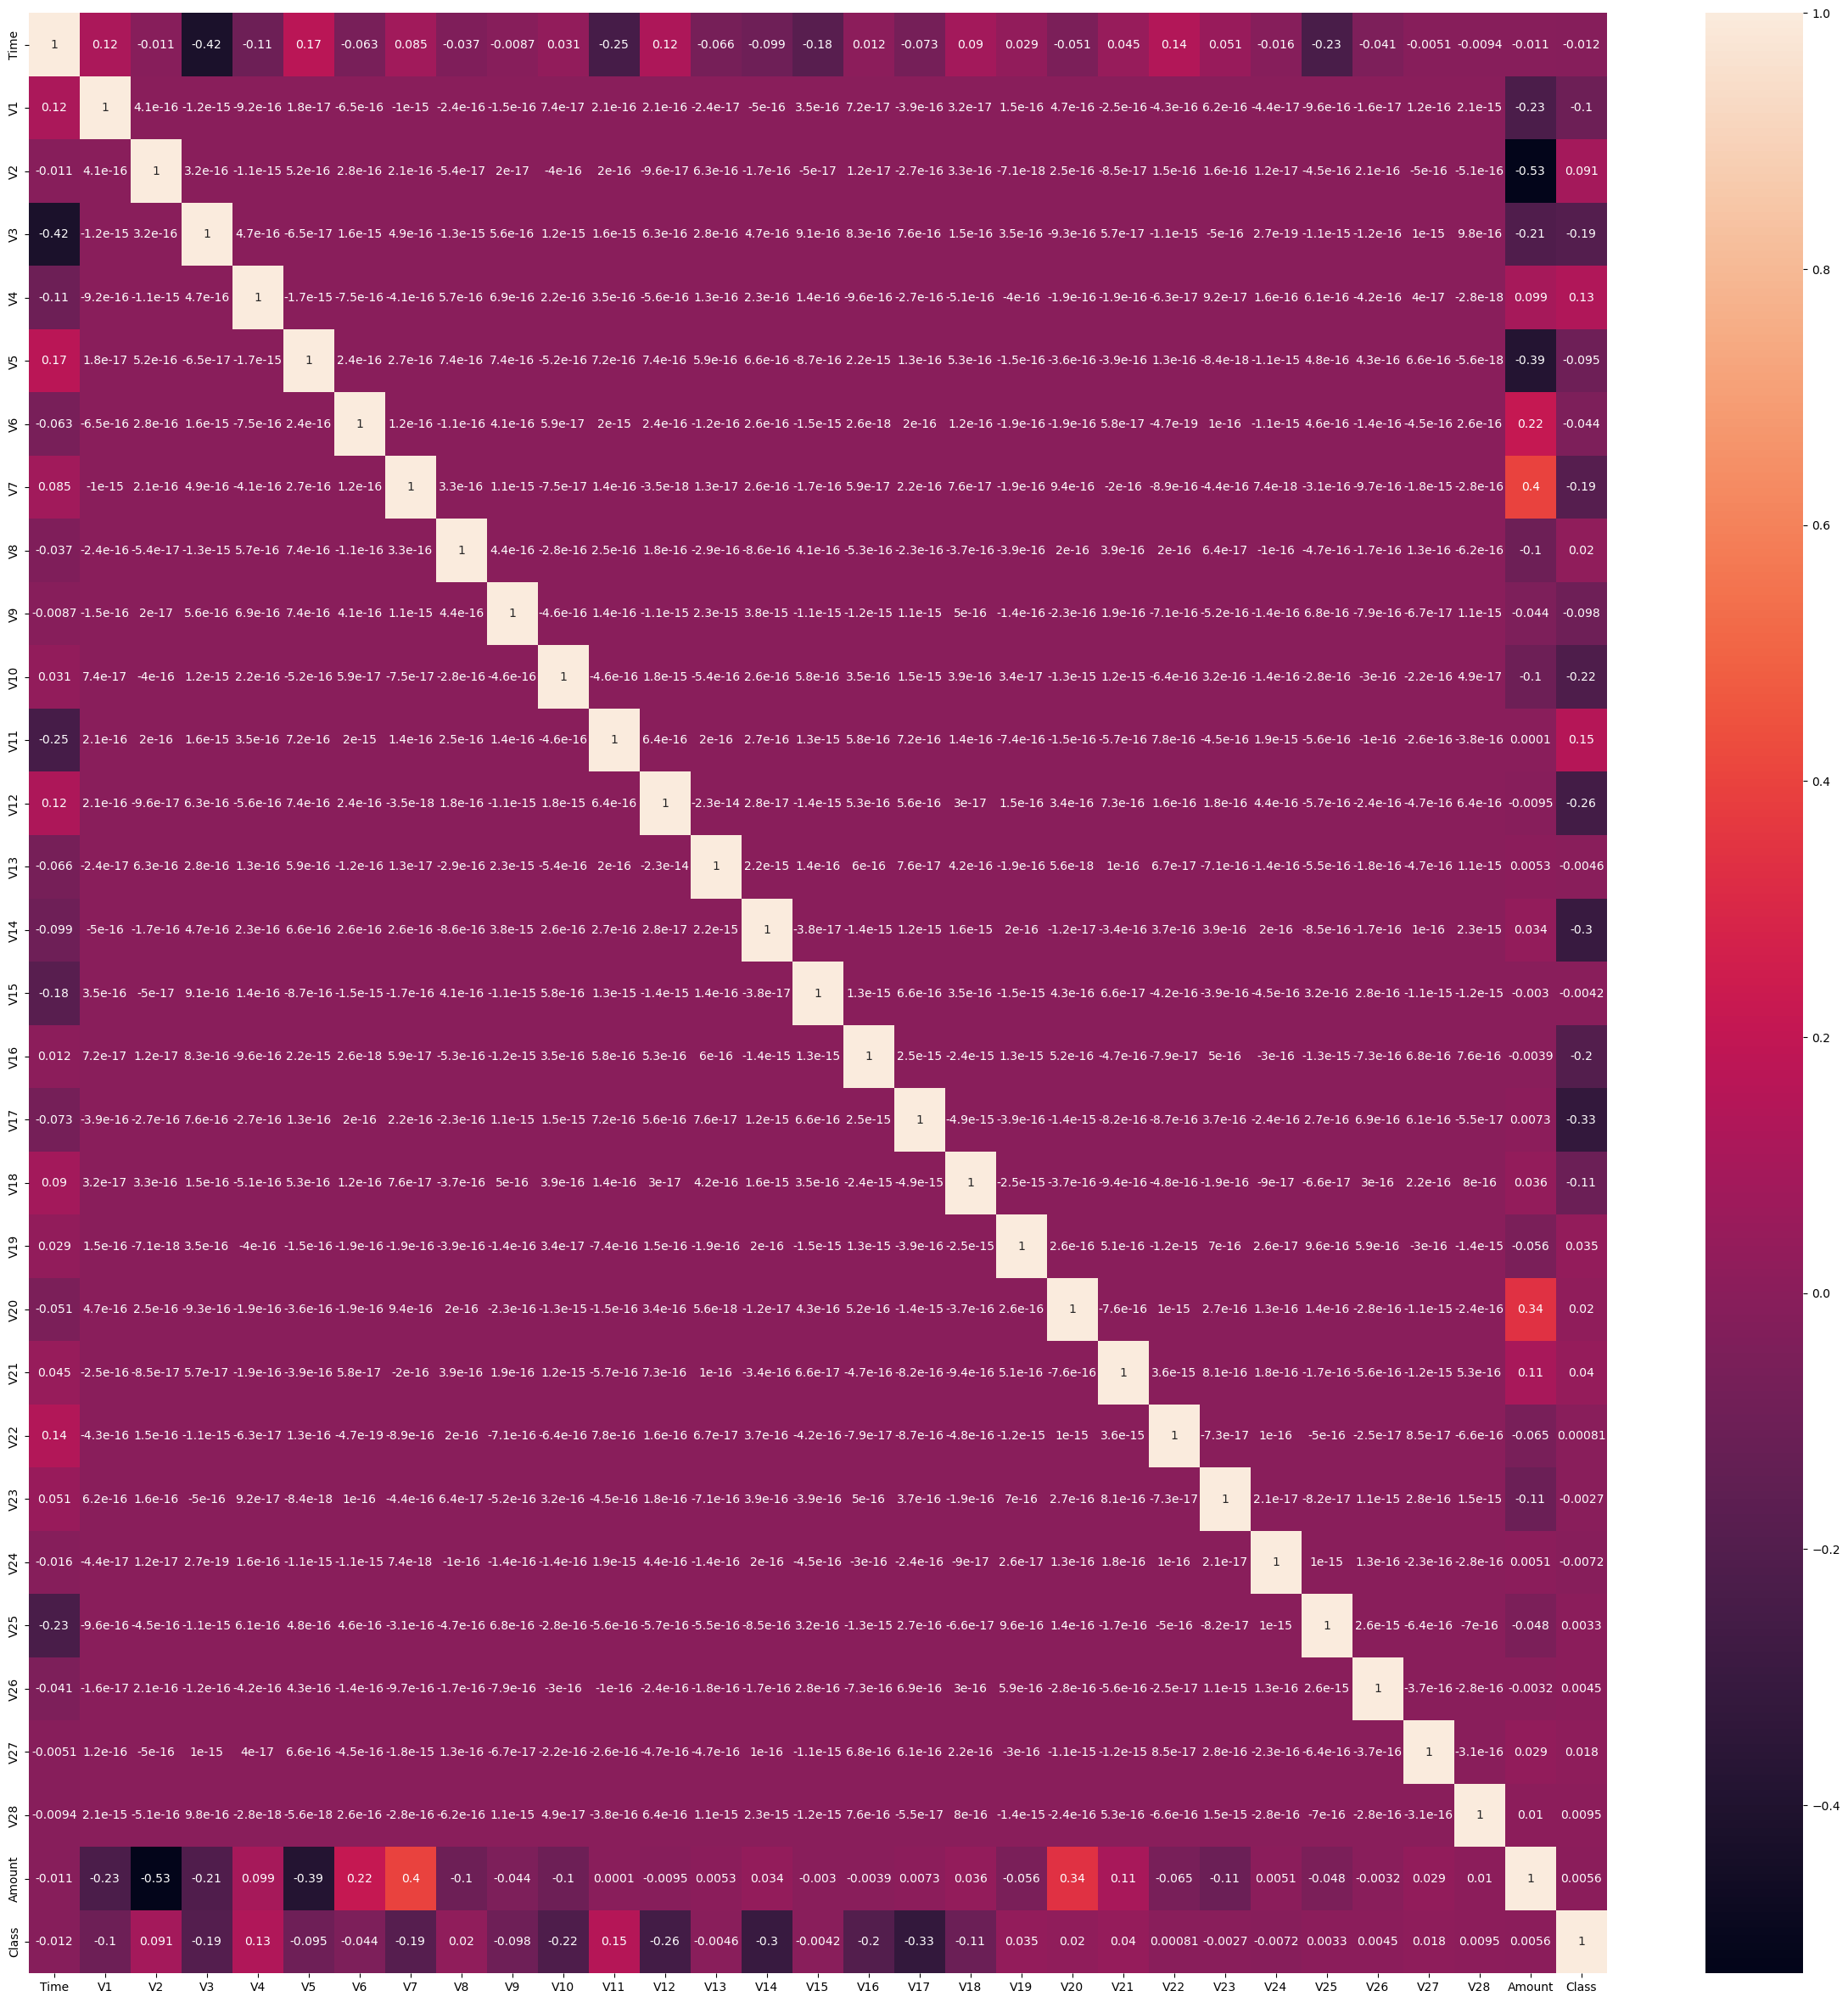

In [12]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True)

In [13]:
# Independent Variable
x = df.loc[:, df.columns != 'Class']
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
# Dependent Variable
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Modeling

In [15]:
# spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Isolation Forest Method

In [16]:
iso_forest = IsolationForest(n_estimators=100, max_samples=len(x_train), random_state=0, verbose=0)

In [17]:
iso_forest.fit(x_train, y_train)

IsolationForest(max_samples=199364, random_state=0)

In [18]:
y_pred = iso_forest.predict(x_test)
y_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [19]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [20]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [21]:
print(accuracy_score(y_test, y_pred))

0.9978465175614152


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.51      0.43       136

    accuracy                           1.00     85443
   macro avg       0.69      0.76      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [23]:
num_wrong_pred = (y_pred != y_test).sum()
print('Isolation Forest have {} number of wrong predictions'.format(num_wrong_pred))

Isolation Forest have 184 number of wrong predictions


### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
y_pred = dtc.predict(x_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print(accuracy_score(y_test, y_pred))

0.9984082955888721


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
num_wrong_pred = (y_pred != y_test).sum()
print('Decision Tree Classifier have {} number of wrong predictions'.format(num_wrong_pred))

Decision Tree Classifier have 136 number of wrong predictions


### Support Vector Classifier

In [33]:
from sklearn.svm import SVC

In [35]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [37]:
y_pred = svc.predict(x_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(accuracy_score(y_test, y_pred))

0.9984082955888721


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
num_wrong_pred = (y_pred != y_test).sum()
print('Support Vector Classifier have {} number of wrong predictions'.format(num_wrong_pred))

Decision Tree Classifier have 136 number of wrong predictions


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
y_pred = rfc.predict(x_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print(accuracy_score(y_test, y_pred))

0.9984082955888721


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jeffery\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
num_wrong_pred = (y_pred != y_test).sum()
print('Decision Tree Classifier have {} number of wrong predictions'.format(num_wrong_pred))

Decision Tree Classifier have 136 number of wrong predictions
